In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as stats
import matplotlib.pyplot as plt 
import os
from datetime import datetime, timedelta
import random
#import gdal as gdal
#from osgeo import ogr
import geopandas as gpd
from shapely.geometry import Point
from functools import partial
from pyproj import Proj, transform
#from pandas_datareader import data as web
import json

/Users/kevalshah/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [37]:
# Read India states shapefile

indshp = "/Users/kevalshah/Downloads/Vaccine_Pricing/India_State_Shapefile_2020/India_State_Boundary.shp"
geodata = gpd.read_file(indshp)
geodata.dtypes

State_Name      object
geometry      geometry
dtype: object

In [38]:
# Read India states shapefile

# indshp = "/Users/kevalshah/Downloads/Vaccine_Pricing/India_States_ADM1_GADM-shp/3e563fd0-8ea1-43eb-8db7-3cf3e23174512020330-1-layr7d.ivha.shp"
# geodata = gpd.read_file(indshp)
# geodata.dtypes

Text(0.5, 1.0, 'India State Map')

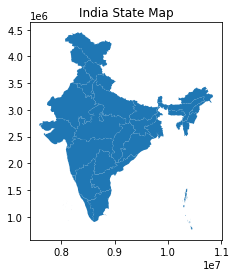

In [39]:
# Plot map

geodata.plot()
plt.title("India State Map")

In [115]:
geodata['State_Name'].loc[0] = "Andaman and Nicobar"
geodata['State_Name'].loc[15] = "Telangana"
geodata['State_Name'].loc[14] = "Chhattisgarh"
geodata['State_Name'].loc[13] = "Tamil Nadu"
geodata.sample(5)

/Users/kevalshah/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,State_Name,geometry
6,Karnataka,"MULTIPOLYGON (((8608594.474 2090389.205, 86086..."
29,Manipur,"POLYGON ((10527945.945 2960789.340, 10528432.7..."
17,Puducherry,"POLYGON ((9150619.186 1888315.624, 9149005.345..."
23,Uttarakhand,"POLYGON ((8801802.136 3692833.282, 8802083.049..."
26,Assam,"POLYGON ((10380499.251 2872443.723, 10380499.2..."


#### Visualization for Vaccine Cost as a percentage of State public health expenditure 

In [134]:
# Read State Vaccine Pricing Exp. data

sphexpData = pd.read_excel("/Users/kevalshah/Downloads/Vaccine_Pricing/Vaccine_pricing_economic_Shruti.xlsx", sheet_name="State_Public_Health_Exp")
sphexpData['Vaccine_cost'] = round(sphexpData['Vaccine_cost']*100,2)
sphexpData.sample(5)

,State,Vaccine_cost
4,Bihar,89.49
0,Andaman and Nicobar,4.83
20,Mizoram,9.74
9,Gujarat,33.58
21,Nagaland,17.02


In [135]:
# Merge state gdp shape file with state vaccine cost data

geosgdp = pd.merge(geodata, sphexpData, left_on = "State_Name", right_on = "State")
geosgdp.sample(5)

,State_Name,geometry,State,Vaccine_cost
15,Andhra Pradesh,"POLYGON ((9426056.496 2174632.352, 9426228.484...",Andhra Pradesh,36.95
24,Assam,"POLYGON ((10380499.251 2872443.723, 10380499.2...",Assam,43.58
13,Chhattisgarh,"POLYGON ((9275926.808 2765881.317, 9276185.437...",Chhattisgarh,37.10
26,Nagaland,"POLYGON ((10596805.532 3126858.281, 10597031.2...",Nagaland,17.02
23,Sikkim,"POLYGON ((9864726.992 3265074.341, 9865469.610...",Sikkim,9.33


In [136]:
# Get coords

geosgdp['coords'] = geosgdp['geometry'].apply(lambda x: x.representative_point().coords[:])
geosgdp['coords'] = [coords[0] for coords in geosgdp['coords']]

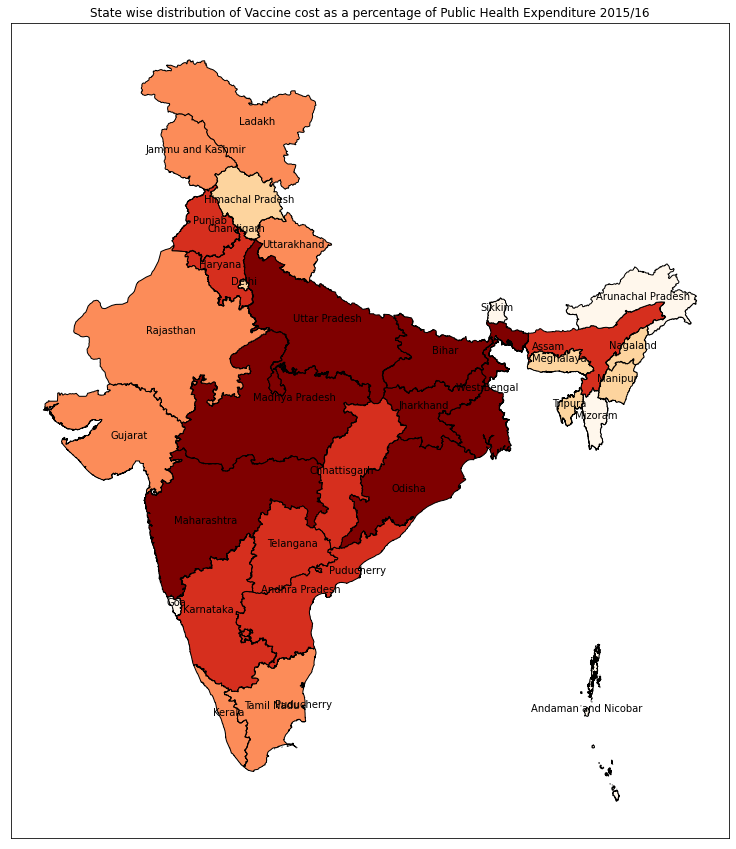

In [137]:
# Visualize 

geosgdp.plot(column="Vaccine_cost", 
             #legend=True, 
             cmap='OrRd', 
             edgecolor='black',
             scheme='quantiles',
             figsize=(30, 15),)

for idx, row in geosgdp.iterrows():
    plt.annotate(text=row['State_Name'], 
                 xy=row['coords'],
                 horizontalalignment='center')
    
plt.title("State wise distribution of Vaccine cost as a percentage of Public Health Expenditure 2015/16")
    
plt.xticks([])
plt.yticks([])

plt.savefig("state_vaccine.png")

plt.show()

#### Visualization for state wise economic loss 

In [152]:
# Read Data

sgstData = pd.read_excel("/Users/kevalshah/Downloads/Vaccine_Pricing/Vaccine_pricing_economic_Shruti.xlsx", sheet_name="sgst_loss")
#sgstData['Percent change'] = round(sphexpData['Percent change']*100,2)
sgstData.sample(5)

,State,Total (Rs. In Crore) 2019-20,Total (Rs. In Crore) 2020-21,Difference / gst loss,Percent change
0,NaN,NaN,NaN,NaN,NaN
32,Puducherry,386.716220,320.354301,-66.361919,-17.160366
16,Mizoram,135.275595,122.573574,-12.702021,-9.389736
34,Telangana,12977.345684,11788.170060,-1189.175624,-9.163473
27,Karnataka,26471.740892,23209.455468,-3262.285424,-12.323653


In [153]:
# Merge state gdp shape file with state vaccine cost data

geosgdp = pd.merge(geodata, sgstData, left_on = "State_Name", right_on = "State")
geosgdp.sample(5)

,State_Name,geometry,State,Total (Rs. In Crore) 2019-20,Total (Rs. In Crore) 2020-21,Difference / gst loss,Percent change
23,Uttar Pradesh,"POLYGON ((8637489.997 3555885.598, 8637654.287...",Uttar Pradesh,22043.434035,19710.849211,-2332.584824,-10.581767
11,Puducherry,"MULTIPOLYGON (((8878474.160 1232399.360, 88784...",Puducherry,386.716220,320.354301,-66.361919,-17.160366
20,Rajasthan,"POLYGON ((8234599.326 3529026.887, 8234599.327...",Rajasthan,12197.411379,11102.534642,-1094.876737,-8.976304
3,Haryana,"POLYGON ((8524318.539 3516490.865, 8524451.392...",Haryana,13921.942583,11951.829787,-1970.112796,-14.151134
8,Madhya Pradesh,"POLYGON ((8724343.278 3106498.184, 8724579.382...",Madhya Pradesh,8840.571530,8217.880666,-622.690864,-7.043559


In [154]:
# Get coords

geosgdp['coords'] = geosgdp['geometry'].apply(lambda x: x.representative_point().coords[:])
geosgdp['coords'] = [coords[0] for coords in geosgdp['coords']]

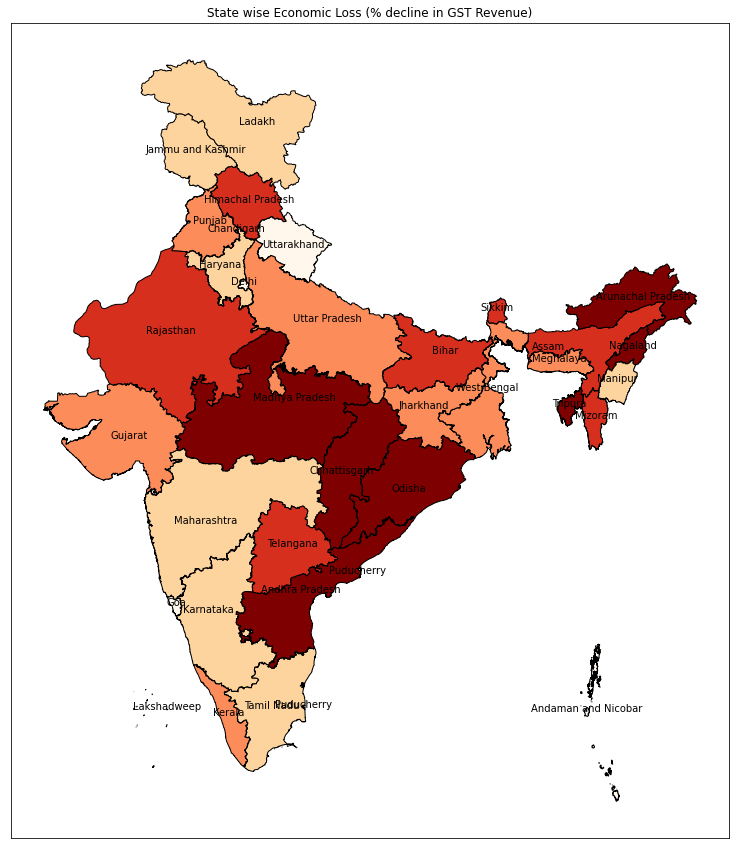

In [155]:
# Visualize 

geosgdp.plot(column="Percent change", 
             #legend=True, 
             cmap='OrRd', 
             edgecolor='black',
             scheme='quantiles',
             figsize=(30, 15),)

for idx, row in geosgdp.iterrows():
    plt.annotate(text=row['State_Name'], 
                 xy=row['coords'],
                 horizontalalignment='center')
    
plt.title("State wise Economic Loss (% decline in GST Revenue)")
    
plt.xticks([])
plt.yticks([])

plt.savefig("state_gst.png")

plt.show()